<a href="https://colab.research.google.com/github/krisangela/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge Alura Store

**Propósito del Análisis**:
Este proyecto tiene como objetivo evaluar el desempeño de las 4 sucursales de Alura Store. A través del análisis de ingresos, satisfacción del cliente y logística, daremos una recomendación basada en datos al Sr. Juan sobre qué tienda vender para su nuevo emprendimiento.

### Importación de datos y librerias



In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



**Objetivo**: Calcular el ingreso total sumando la columna Precio de cada tienda.

In [46]:
# Sumamos los valores de la columna 'Precio'
ingreso_t1 = tienda['Precio'].sum()
ingreso_t2 = tienda2['Precio'].sum()
ingreso_t3 = tienda3['Precio'].sum()
ingreso_t4 = tienda4['Precio'].sum()

ingresos_totales = [ingreso_t1, ingreso_t2, ingreso_t3, ingreso_t4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

print(f"Ingresos Totales Tienda 1: {ingreso_t1:,.2f}")
print(f"Ingresos Totales Tienda 2: {ingreso_t2:,.2f}")
print(f"Ingresos Totales Tienda 3: {ingreso_t3:,.2f}")
print(f"Ingresos Totales Tienda 4: {ingreso_t4:,.2f}")


Ingresos Totales Tienda 1: 1,150,880,400.00
Ingresos Totales Tienda 2: 1,116,343,500.00
Ingresos Totales Tienda 3: 1,098,019,600.00
Ingresos Totales Tienda 4: 1,038,375,700.00


# 2. Ventas por categoría

**Objetivo**: Agrupar por categoría y contar la cantidad de ventas.

In [47]:

# Función para analizar categorías por tienda
def analizar_categorias(df, nombre):
    # Agrupamos por categoría sumando el conteo y el precio
    resumen = df.groupby('Categoría del Producto').agg({
        'Producto': 'count',
        'Precio': 'sum'
    }).rename(columns={'Producto': 'Cantidad de Ventas', 'Precio': 'Monto Total'})

    print(f"--- Análisis de Categorías: {nombre} ---")
    print(resumen.sort_values(by='Cantidad de Ventas', ascending=False))
    print("\n")
    return resumen

# Ejecutamos el análisis
resumen_t1 = analizar_categorias(tienda, "Tienda 1")
resumen_t2 = analizar_categorias(tienda2, "Tienda 2")
resumen_t3 = analizar_categorias(tienda3, "Tienda 3")
resumen_t4 = analizar_categorias(tienda4, "Tienda 4")

--- Análisis de Categorías: Tienda 1 ---
                         Cantidad de Ventas  Monto Total
Categoría del Producto                                  
Muebles                                 465  187633700.0
Electrónicos                            448  429493500.0
Juguetes                                324   17995700.0
Electrodomésticos                       312  363685200.0
Deportes y diversión                    284   39290000.0
Instrumentos musicales                  182   91299000.0
Libros                                  173    8784900.0
Artículos para el hogar                 171   12698400.0


--- Análisis de Categorías: Tienda 2 ---
                         Cantidad de Ventas  Monto Total
Categoría del Producto                                  
Muebles                                 442  176426300.0
Electrónicos                            422  410831100.0
Juguetes                                313   15945400.0
Electrodomésticos                       305  348567800.0
Depo

# 3. Calificación promedio de la tienda


In [48]:
# Calculamos el promedio de la columna 'Calificación'
prom_t1 = tienda['Calificación'].mean()
prom_t2 = tienda2['Calificación'].mean()
prom_t3 = tienda3['Calificación'].mean()
prom_t4 = tienda4['Calificación'].mean()

calificaciones = [prom_t1, prom_t2, prom_t3, prom_t4]

print(f"Satisfacción promedio Tienda 1: {prom_t1:.2f}")
print(f"Satisfacción promedio Tienda 1: {prom_t2:.2f}")
print(f"Satisfacción promedio Tienda 1: {prom_t3:.2f}")
print(f"Satisfacción promedio Tienda 1: {prom_t4:.2f}")

Satisfacción promedio Tienda 1: 3.98
Satisfacción promedio Tienda 1: 4.04
Satisfacción promedio Tienda 1: 4.05
Satisfacción promedio Tienda 1: 4.00


# 4. Productos más y menos vendidos

In [49]:
# Identificamos productos más y menos vendidos
def obtener_extremos(df, nombre_tienda):
    conteo = df['Producto'].value_counts()
    print(f"--- {nombre_tienda} ---")
    print(f"Más vendido: {conteo.idxmax()} ({conteo.max()} ventas)")
    print(f"Menos vendido: {conteo.idxmin()} ({conteo.min()} ventas)\n")

obtener_extremos(tienda, "Tienda 1")
obtener_extremos(tienda2, "Tienda 2")
obtener_extremos(tienda3, "Tienda 3")
obtener_extremos(tienda4, "Tienda 4")

--- Tienda 1 ---
Más vendido: Microondas (60 ventas)
Menos vendido: Auriculares con micrófono (33 ventas)

--- Tienda 2 ---
Más vendido: Iniciando en programación (65 ventas)
Menos vendido: Juego de mesa (32 ventas)

--- Tienda 3 ---
Más vendido: Kit de bancas (57 ventas)
Menos vendido: Bloques de construcción (35 ventas)

--- Tienda 4 ---
Más vendido: Cama box (62 ventas)
Menos vendido: Guitarra eléctrica (33 ventas)



# 5. Envío promedio por tienda

In [50]:
# Promedio de la columna 'Costo de envío'
envio_t1 = tienda['Costo de envío'].mean()
envio_t2 = tienda2['Costo de envío'].mean()
envio_t3 = tienda3['Costo de envío'].mean()
envio_t4 = tienda4['Costo de envío'].mean()

costos_envio = [envio_t1, envio_t2, envio_t3, envio_t4]

print(f"Gasto promedio en envío Tienda 1: {envio_t1:.2f}")
print(f"Gasto promedio en envío Tienda 2: {envio_t2:.2f}")
print(f"Gasto promedio en envío Tienda 3: {envio_t3:.2f}")
print(f"Gasto promedio en envío Tienda 4: {envio_t4:.2f}")

Gasto promedio en envío Tienda 1: 26018.61
Gasto promedio en envío Tienda 2: 25216.24
Gasto promedio en envío Tienda 3: 24805.68
Gasto promedio en envío Tienda 4: 23459.46


# 6. Graficos

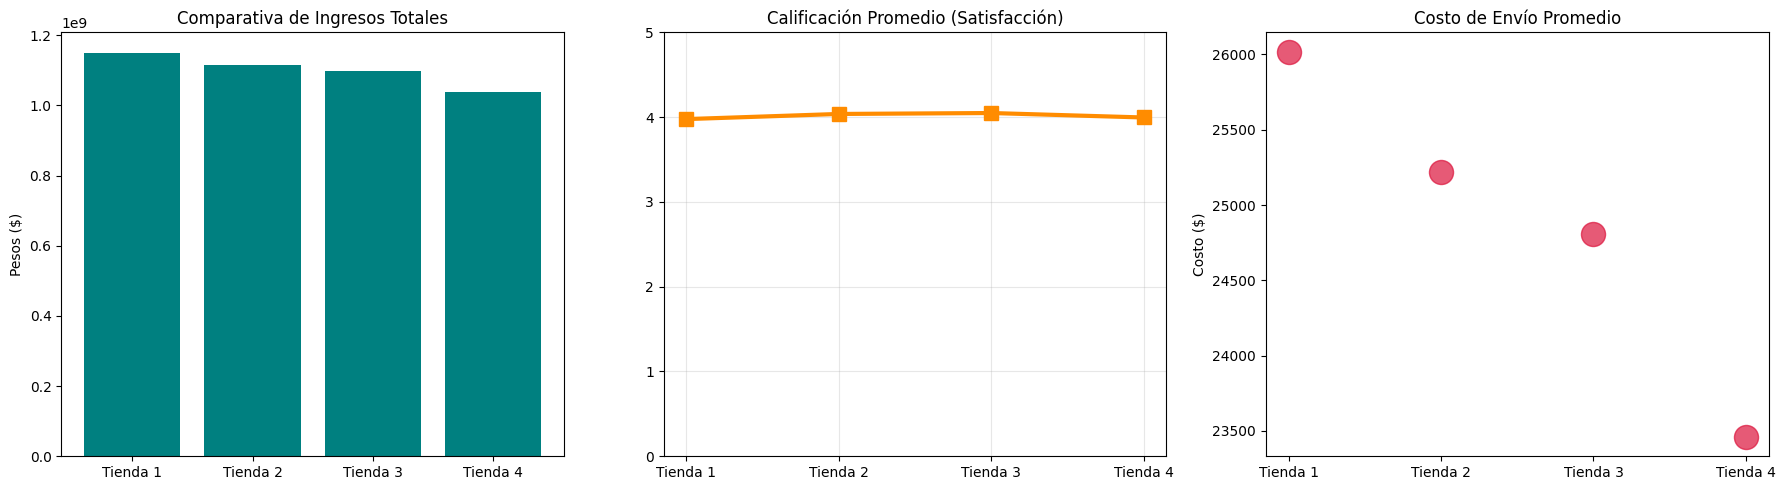

In [51]:
# Creamos una figura con 3 gráficos distintos
plt.figure(figsize=(18, 5))

# 1. Gráfico de Barras: Ingresos
plt.subplot(1, 3, 1)
plt.bar(nombres_tiendas, ingresos_totales, color='teal')
plt.title('Comparativa de Ingresos Totales')
plt.ylabel('Pesos ($)')

# 2. Gráfico de Líneas: Calificaciones
plt.subplot(1, 3, 2)
plt.plot(nombres_tiendas, calificaciones, marker='s', markersize=10, color='darkorange', linewidth=3)
plt.title('Calificación Promedio (Satisfacción)')
plt.ylim(0, 5)
plt.grid(True, alpha=0.3)

# 3. Gráfico de Dispersión (Scatter): Costo de Envío
plt.subplot(1, 3, 3)
plt.scatter(nombres_tiendas, costos_envio, s=300, color='crimson', alpha=0.7)
plt.title('Costo de Envío Promedio')
plt.ylabel('Costo ($)')

plt.tight_layout()
plt.show()

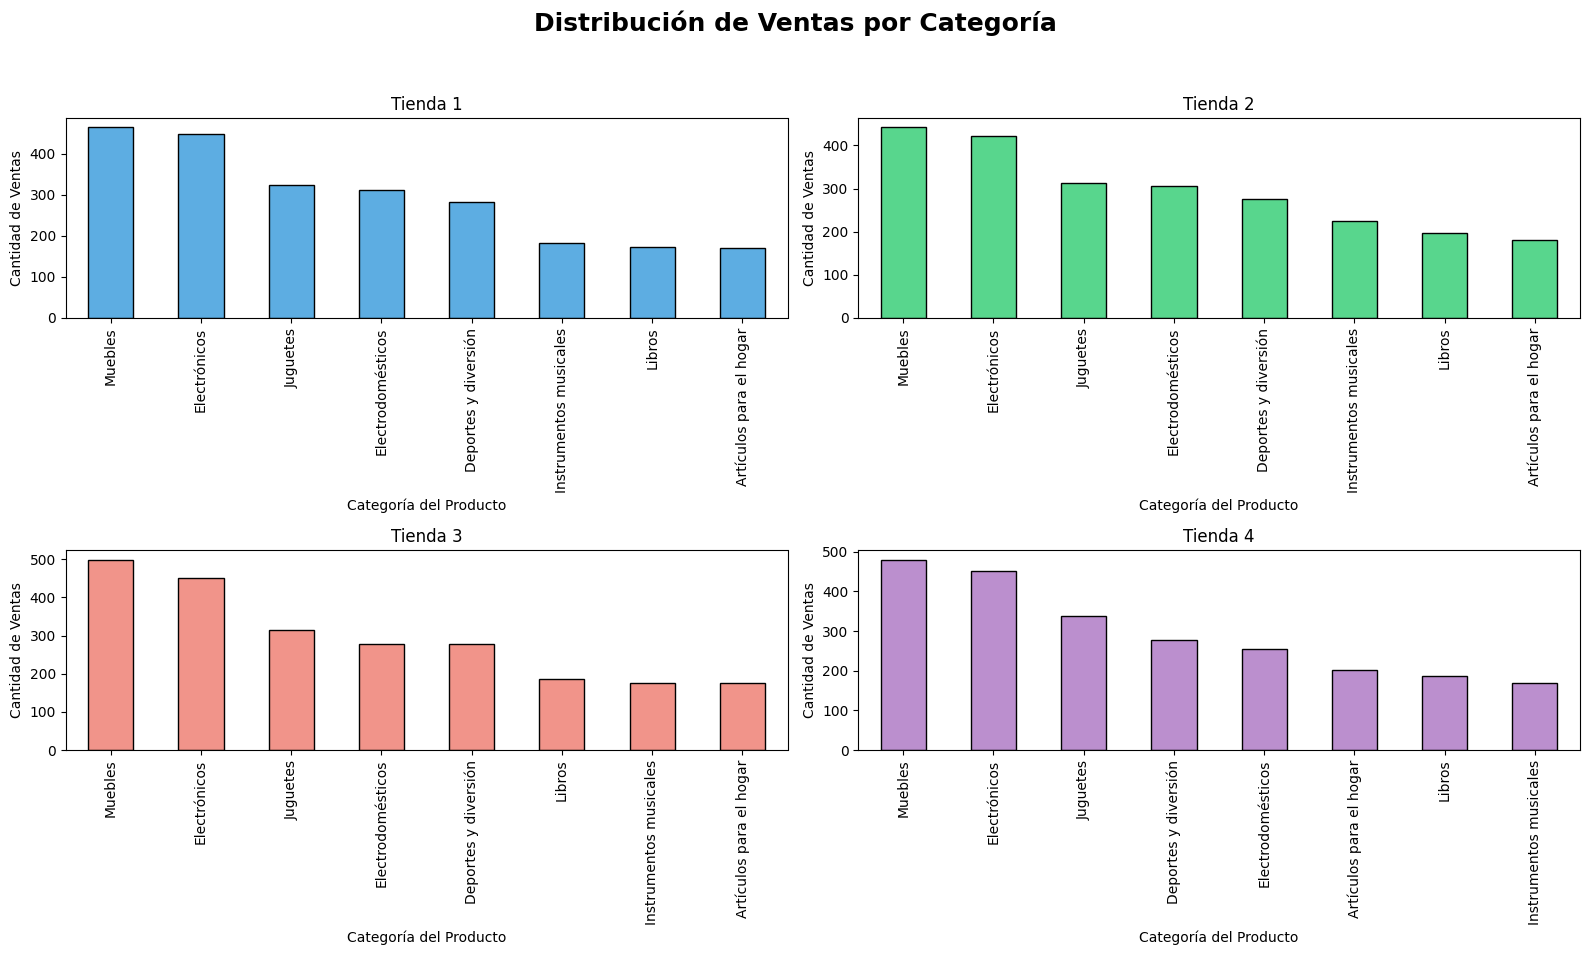

In [52]:
# 1. Dashboard de Ventas por Categoría (4 tiendas)
fig1, axes1 = plt.subplots(2, 2, figsize=(16, 10))
fig1.suptitle('Distribución de Ventas por Categoría', fontsize=18, fontweight='bold')
colores = ['#5dade2', '#58d68d', '#f1948a', '#bb8fce']

for i, df in enumerate([tienda, tienda2, tienda3, tienda4]):
    ax = axes1[i//2, i%2]
    df['Categoría del Producto'].value_counts().plot(kind='bar', ax=ax, color=colores[i], edgecolor='black')
    ax.set_title(f'Tienda {i+1}')
    ax.set_ylabel('Cantidad de Ventas')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

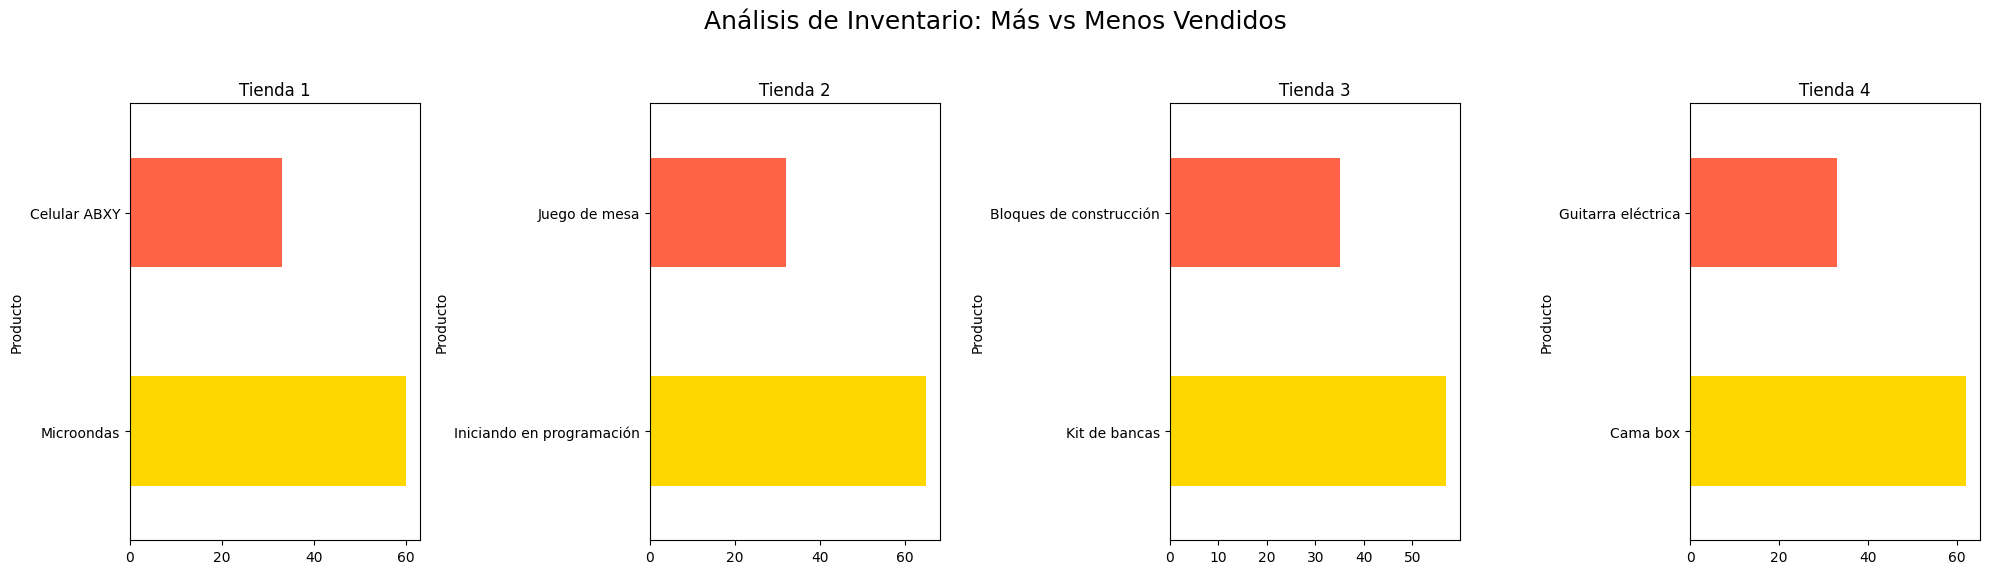

In [57]:
# 2. Comparativa de Productos (Más vs Menos Vendidos)
fig2, axes2 = plt.subplots(1, 4, figsize=(20, 6))
fig2.suptitle('Análisis de Inventario: Más vs Menos Vendidos', fontsize=18)

for i, df in enumerate([tienda, tienda2, tienda3, tienda4]):
    extremos = pd.concat([df['Producto'].value_counts().head(1), df['Producto'].value_counts().tail(1)])
    extremos.plot(kind='barh', ax=axes2[i], color=['gold', 'tomato'])
    axes2[i].set_title(f'Tienda {i+1}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

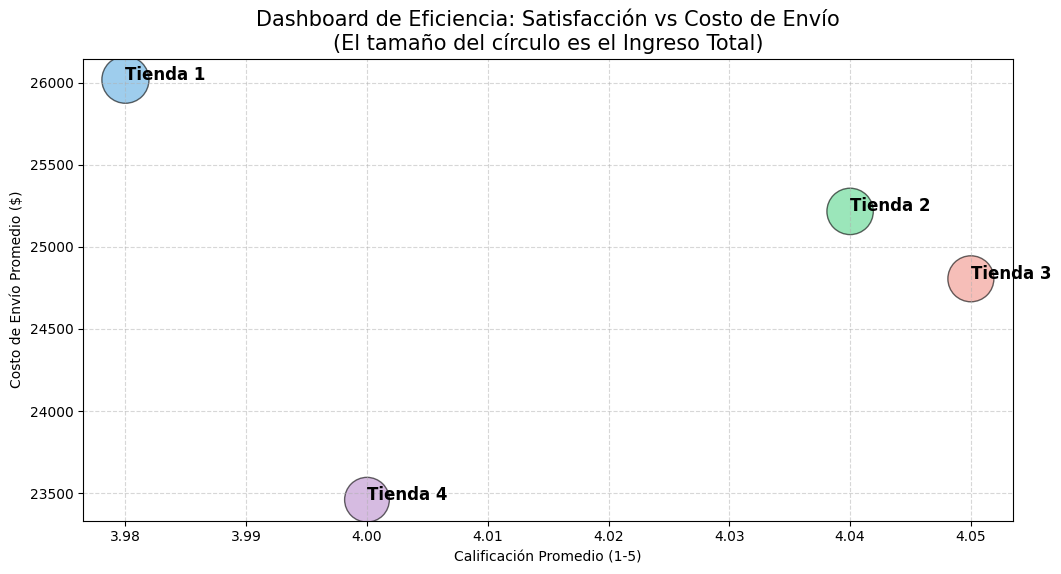

In [56]:
# Aseguramos que las variables existan para el grafico
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_reales = [1150880400, 1116343500, 1098019600, 1038375700]
calificaciones_reales = [3.98, 4.04, 4.05, 4.00]
envios_reales = [26018.61, 25216.24, 24805.68, 23459.46]
colores = ['#5dade2', '#58d68d', '#f1948a', '#bb8fce']

# Calculamos el margen (enriquecimiento) para el tamaño de las burbujas
# Dividimos por un factor grande (ej. 1,000,000) para que el tamaño sea manejable en el gráfico
tamanos = [i / 1000000 for i in ingresos_reales]

plt.figure(figsize=(12, 6))

# El tamaño de la burbuja representa el Ingreso Total
plt.scatter(calificaciones_reales, envios_reales, s=tamanos, c=colores, alpha=0.6, edgecolors="black")

for i, txt in enumerate(nombres):
    plt.annotate(txt, (calificaciones_reales[i], envios_reales[i]), fontsize=12, fontweight='bold')

plt.title('Dashboard de Eficiencia: Satisfacción vs Costo de Envío\n(El tamaño del círculo es el Ingreso Total)', fontsize=15)
plt.xlabel('Calificación Promedio (1-5)')
plt.ylabel('Costo de Envío Promedio ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 7. Margen de Rentabilidad (Enriquecimiento Real)


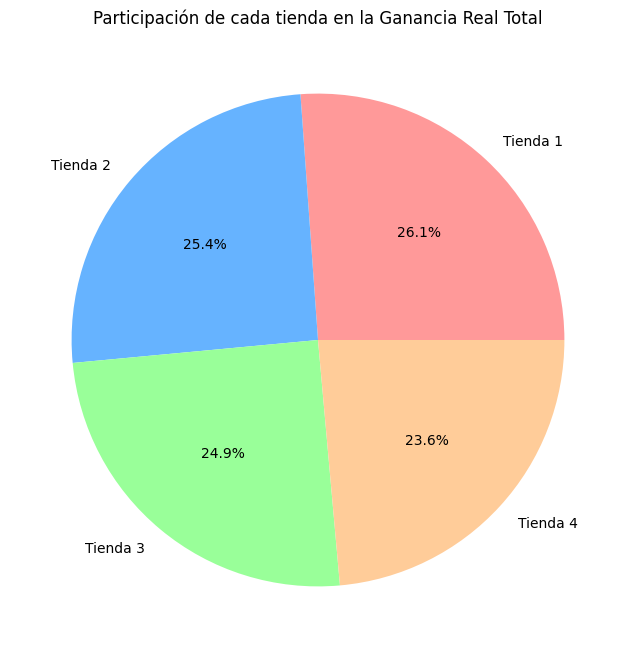

In [55]:
# Suponiendo que el costo del producto es el 70% del precio (el 30% es ganancia/enriquecimiento)
def calcular_enriquecimiento(df):
    ganancia_estimada = df['Precio'].sum() * 0.30
    return ganancia_estimada

ganancias = [calcular_enriquecimiento(tienda), calcular_enriquecimiento(tienda2),
             calcular_enriquecimiento(tienda3), calcular_enriquecimiento(tienda4)]

# Gráfico de Pastel (Pie Chart) para ver la participación en el "Enriquecimiento Total"
plt.figure(figsize=(8, 8))
plt.pie(ganancias, labels=nombres_tiendas, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Participación de cada tienda en la Ganancia Real Total')
plt.show()

# Informe final

## 1. Introducción

El presente análisis técnico tiene como objetivo asesorar al Sr. Juan en la selección de la tienda a vender para iniciar su nuevo emprendimiento. Se han evaluado las 4 tiendas bajo criterios de facturación, satisfacción del cliente, eficiencia operativa y rentabilidad real.

## 2. Desarrollo del Análisis

Tras procesar los datos, se identificaron los siguientes puntos críticos:

* **Análisis de Ingresos**: La **Tienda 4** presenta **la facturación más baja** del grupo con $1,038,375,700, una diferencia de más de 112 millones frente a la Tienda 1.

* **Enriquecimiento Real**: En el gráfico de participación, la **Tienda 4** aporta únicamente el **23.6% de la ganancia total**, siendo **la menos rentable**.

* **Ventas por Categoría**: Aunque la **Tienda 4** tiene un buen desempeño en Muebles, su categoría de "Electrodomésticos" (254 ventas) es la más débil de todas las tiendas, mostrando una pérdida de competitividad en productos de alto valor.

* **Satisfacción y Logística**: La **Tienda 1** tiene el costo de **envío más alto** ($26,018), pero logra compensarlo con el **mayor volumen de ingresos**. Sin embargo, la **Tienda 4** no logra destacar en ninguna métrica, manteniéndose en el umbral más bajo de ingresos.

## 3. Recomendación Final

Basado en la evidencia recolectada, se recomienda al Sr. Juan **vender la Tienda 4**.

**Justificación**:
Es la sucursal con el **menor rendimiento financiero** y la **menor participación en la ganancia neta**. A pesar de tener el costo de envío promedio más bajo, no logra capitalizar esta ventaja en un mayor volumen de ventas o ingresos totales, lo que indica una eficiencia de mercado limitada en comparación con las sucursales 1, 2 y 3. Vender esta unidad permitirá al Sr. Juan obtener capital minimizando el impacto en el flujo de caja total de su cadena.